In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [29]:
train_df=pd.read_csv('C:/Users/M.LAPTOP/Desktop/archive//fashion_mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_df=pd.read_csv('C:/Users/M.LAPTOP/Desktop/archive//fashion_mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data=np.array(train_df,dtype='float32')
test_data=np.array(test_df,dtype='float32')

x_train=train_data[:,1:] / 255
y_train=train_data[:,0]

x_test=test_data[:,1:] / 255
y_test=test_data[:,0]

In [8]:
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,)

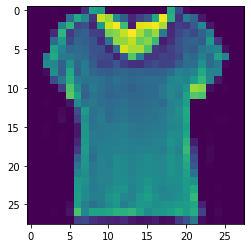

In [33]:
image=x_train[100,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [18]:
im_rows=28
im_cols=28
batch_size=512
im_shape=(im_rows,im_cols,1)

x_train=x_train.reshape(x_train.shape[0], *im_shape)
x_test=x_test.reshape(x_test.shape[0], *im_shape)
x_validate=x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape : {}'.format(x_train.shape))
print('x_test shape : {}'.format(x_test.shape))
print('x_validate shape : {}'.format(x_validate.shape))

x_train shape : (48000, 28, 28, 1)
x_test shape : (10000, 28, 28, 1)
x_validate shape : (12000, 28, 28, 1)


In [19]:
cnn_model=Sequential([
    Conv2D(filters=32,kernel_size=3, activation='relu',input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [22]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
94/94 [==============================] - 22s 220ms/step - loss: 0.7452 - accuracy: 0.7406 - val_loss: 0.4708 - val_accuracy: 0.8319
Epoch 2/10
94/94 [==============================] - 21s 220ms/step - loss: 0.4359 - accuracy: 0.8476 - val_loss: 0.3998 - val_accuracy: 0.8618
Epoch 3/10
94/94 [==============================] - 21s 225ms/step - loss: 0.3878 - accuracy: 0.8647 - val_loss: 0.3603 - val_accuracy: 0.8761
Epoch 4/10
94/94 [==============================] - 21s 221ms/step - loss: 0.3518 - accuracy: 0.8766 - val_loss: 0.3365 - val_accuracy: 0.8804
Epoch 5/10
94/94 [==============================] - 22s 231ms/step - loss: 0.3311 - accuracy: 0.8835 - val_loss: 0.3199 - val_accuracy: 0.8879
Epoch 6/10
94/94 [==============================] - 21s 221ms/step - loss: 0.3181 - accuracy: 0.8872 - val_loss: 0.3096 - val_accuracy: 0.8920
Epoch 7/10
94/94 [==============================] - 20s 209ms/step - loss: 0.3053 - accuracy: 0.8933 - val_loss: 0.3007 - val_accuracy: 0.8944

In [24]:
score=cnn_model.evaluate(x_test, y_test, verbose=0)

print('Test Loss      : {:.4f}'.format(score[0]))
print('Test Accuracy  : {:.4f}'.format(score[1]))

Test Loss      : 0.2805
Test Accuracy  : 0.9018
